Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


      mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
df  37.599  28.934     3.0     90.0      1.683    1.191     241.0     217.0   

    r_hat  
df   1.02  


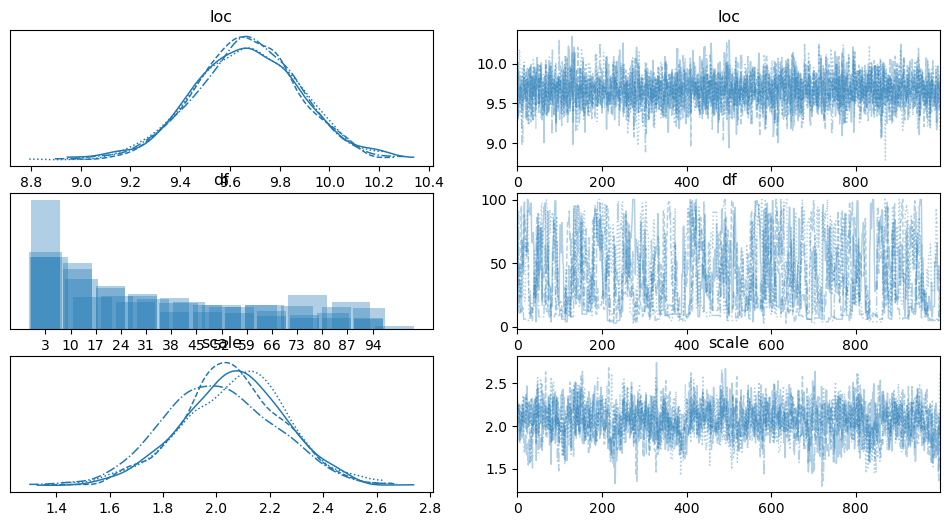

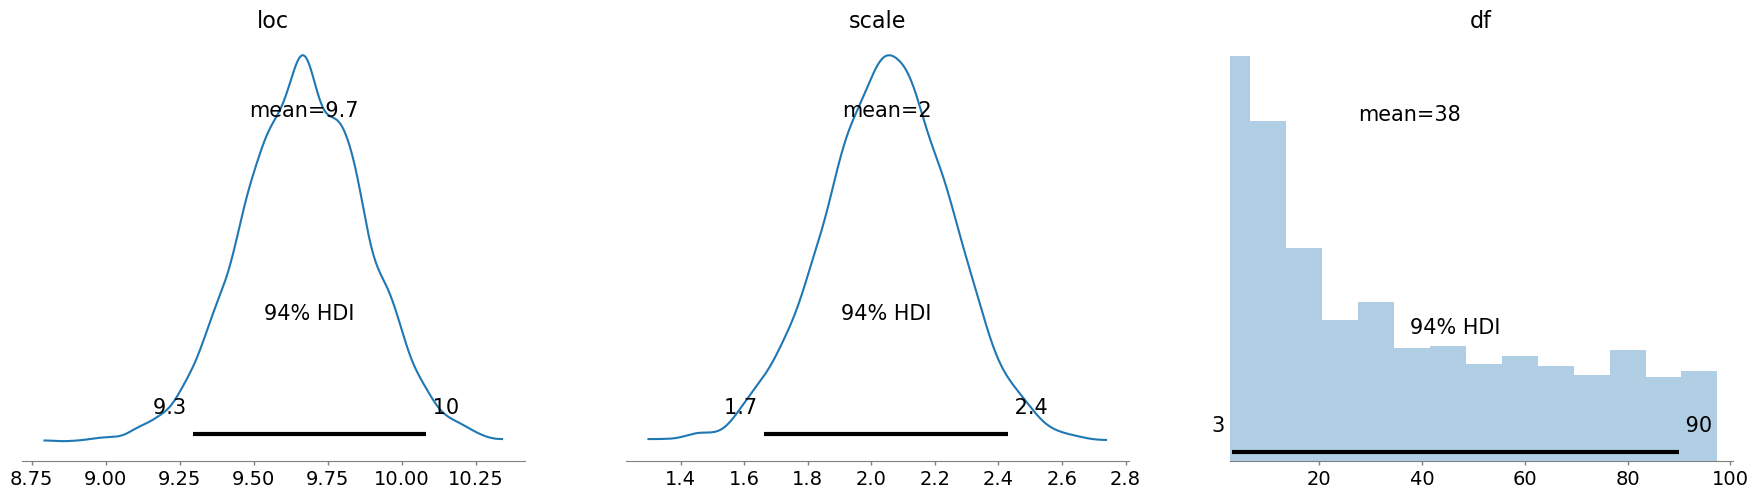

In [2]:
import pymc as pm
import numpy as np

n = 100  
loc_true = 10
scale_true = 2
df_true = 15

np.random.seed(42) 
x = np.random.standard_t(df=df_true, size=n) * scale_true + loc_true

with pm.Model() as model:
    loc = pm.Normal('loc', mu=0, sigma=10)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)
    
    likelihood = pm.StudentT('x', mu=loc, sigma=scale, nu=df, observed=x)

    trace = pm.sample(1000, return_inferencedata=True)

with model:
    pm.plot_trace(trace)
    pm.plot_posterior(trace, var_names=['loc', 'scale', 'df'])

    summary = pm.summary(trace, var_names=['df'])
    print(summary)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    loc      float64 3.277e+03
    df       float64 240.8
    scale    float64 454.1
<xarray.Dataset>
Dimensions:  ()
Data variables:
    loc      float64 1.001
    df       float64 1.023
    scale    float64 1.012
Divergences: <xarray.DataArray 'diverging' ()>
array(0)
Mean Acceptance Rate: 0.8173617388595253


<Axes: >

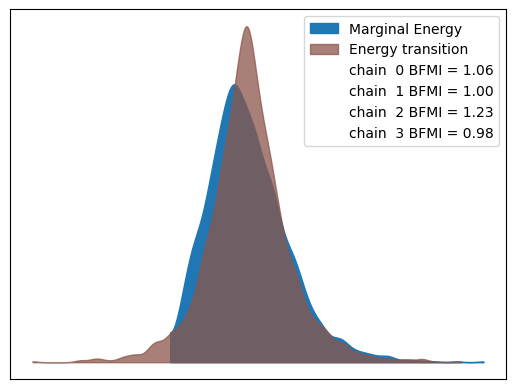

In [8]:
import arviz as az

ess = az.ess(trace)
print(ess)

r_hat = az.rhat(trace)
print(r_hat)

divergences = trace.sample_stats["diverging"].sum()
print(f"Divergences: {divergences}")

acceptance_rates = trace.sample_stats["acceptance_rate"].values
print(f"Mean Acceptance Rate: {acceptance_rates.mean()}")

az.plot_energy(trace)
